In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\carsi\Downloads`


In [2]:
Pkg.add(["Random","Images","Colors","MAT","LinearAlgebra","MLDatasets"])

    Updating registry at `C:\Users\carsi\.julia\registries\General.toml`
   Resolving package versions...
   Installed TiledIteration ─────────────────── v0.5.0
   Installed ImageSegmentation ──────────────── v1.8.2
   Installed ContextVariablesX ──────────────── v0.1.3
   Installed ImageMagick ────────────────────── v1.4.0
   Installed ShowCases ──────────────────────── v0.1.0
   Installed HistogramThresholding ──────────── v0.3.1
   Installed LoggingExtras ──────────────────── v1.1.0
   Installed NNlib ──────────────────────────── v0.9.24
   Installed ZipFile ────────────────────────── v0.10.1
   Installed RegionTrees ────────────────────── v0.3.2
   Installed Images ─────────────────────────── v0.26.1
   Installed NearestNeighbors ───────────────── v0.4.21
   Installed InitialValues ──────────────────── v0.3.1
   Installed MAT ────────────────────────────── v0.10.7
   Installed BFloat16s ──────────────────────── v0.5.0
   Installed MetaGraphs ─────────────────────── v0.7.2
   Instal

In [3]:
using Images, Colors, MLDatasets

In [4]:
dataset = MNIST()

This program has requested access to the data dependency MNIST.
which is not currently installed. It can be installed automatically, and you will not see this message again.

Dataset: THE MNIST DATABASE of handwritten digits
Authors: Yann LeCun, Corinna Cortes, Christopher J.C. Burges
Website: http://yann.lecun.com/exdb/mnist/

[LeCun et al., 1998a]
    Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner.
    "Gradient-based learning applied to document recognition."
    Proceedings of the IEEE, 86(11):2278-2324, November 1998

The files are available for download at the offical
website linked above. Note that using the data
responsibly and respecting copyright remains your
responsibility. The authors of MNIST aren't really
explicit about any terms of use, so please read the
website to make sure you want to download the
dataset.



Do you want to download the dataset from ["https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz", "https://ossci-datasets.s3.amazonaws.com/mn

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :train
  features  =>    28×28×60000 Array{Float32, 3}
  targets   =>    60000-element Vector{Int64}

In [5]:
testset = MNIST(:test)

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :test
  features  =>    28×28×10000 Array{Float32, 3}
  targets   =>    10000-element Vector{Int64}

In [6]:
dataset.targets

60000-element Vector{Int64}:
 5
 0
 4
 1
 9
 2
 1
 3
 1
 4
 3
 5
 3
 ⋮
 7
 8
 9
 2
 9
 5
 1
 8
 3
 5
 6
 8

In [7]:
dataset.features

28×28×60000 Array{Float32, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0    

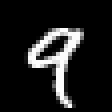

In [8]:
Gray.(dataset.features[:,:,5]')

## BME 574 Midterm Exam (take-home)

The dataset above is the famous MNIST dataset of handwritten digits (28x28 grayscale images).
The challenge for this midterm is to find the most informative pixels for each digit from this dataset
using techniques that you have learning previously.  Here is how to start:
1. Create a set of output (label) vectors $\{y_j\}$ of length 10 that represent the labels (0-9)
here are a few examples:
$$
\begin{align}
^{"}1^{"}=\begin{bmatrix} 1\\0\\0\\ \vdots \\0 \end{bmatrix}
\end{align}
$$
$$
\begin{align}
^{"}3^{"}=\begin{bmatrix} 0\\0\\1\\ \vdots \\0 \end{bmatrix}
\end{align}
$$
$$
\begin{align}
^{"}0^{"}=\begin{bmatrix} 0\\0\\0\\ \vdots \\1 \end{bmatrix}
\end{align}
$$
2. Now let $B$ be the set of output (label) vectors

$$
\begin{align}
B = \begin{bmatrix} y_{1} & y_{2} & y_{3} & \ldots & y_{n}\end{bmatrix}
\end{align}
$$

3. Let the matrix $A$ be the corresponding reshaped (vectorized) MNIST images (one in each row)

$$
\begin{align}
A = \begin{bmatrix} x_{1} & x_{2} & x_{3} & \ldots & x_{n}\end{bmatrix}
\end{align}
$$

4. $AX = B$ maps from the image space to the label space

Your task is to use solvers for $AX=B$ that promote sparsity to rank the pixels in the MNIST dataset that are most informative for correctly labeling the digits. You will have to come up with your own heuristics or empirical rules for this. Be sure to visualize the results from X. Apply your most important pixels to the test data set to see how accurate you are with as few pixels as possible. Redo the analysis with each digit individually to ﬁnd the most important pixels for each digit. Think about the interpretation of what you are doing with this $AX = B$ problem.
Hint: for testing, it may be a good idea to start with a smaller dataset (e.g. 1000 images)

An important part of the midterm is that you come up with an accuracy metric to see how good the predictive strength of the model is.  It may be a good idea to first maximize the accuracy with respect to the Lasso parameter lambda.
Once you identify the most important pixels for each digit, you can ask how much the accuracy decreases when only using these pixels. Again, you have to come up with your own metric for choosing which digit is most likely.

In [45]:
import Pkg
Pkg.activate(".")
Pkg.add(["ScikitLearn","JuMP","Ipopt","Statistics","GR"])

  Activating project at `C:\Users\carsi\Downloads`
   Resolving package versions...
  No Changes to `C:\Users\carsi\Downloads\Project.toml`
  No Changes to `C:\Users\carsi\Downloads\Manifest.toml`


In [11]:
import Pkg; Pkg.add("GLMNet")

   Resolving package versions...
   Installed glmnet_jll ─ v2.0.13+0
   Installed GLMNet ───── v0.7.4
    Updating `C:\Users\carsi\Downloads\Project.toml`
  [8d5ece8b] + GLMNet v0.7.4
    Updating `C:\Users\carsi\Downloads\Manifest.toml`
  [8d5ece8b] + GLMNet v0.7.4
⌅ [78c6b45d] + glmnet_jll v2.0.13+0
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated -m`
Precompiling project...
  ✓ glmnet_jll
  ✓ ArrayInterface → ArrayInterfaceGPUArraysCoreExt
  ✓ MetaGraphs
  ✓ Clustering
  ✓ JpegTurbo
  ✓ Sixel
  ✓ ScikitLearn
  ✓ HistogramThresholding
  ✓ PNGFiles
  ✓ ImageMagick
  ✓ Netpbm
  ✓ GLMNet
  ✓ ImageTransformations
  ✓ ImageBinarization
  ✓ ImageMorphology
  ✓ ImageContrastAdjustment
  ✓ ImageDistances
  ✓ ImageFiltering
  ✓ ImageSegmentation
  ✓ ImageCorners
  ✓ ImageQualityIndexes
  ✓ Images
  22 dependencies successfully precompiled in 133 seconds. 431 already precompiled.


In [48]:
using LinearAlgebra
using MLDatasets
using Plots
using JuMP
using Ipopt
using Statistics
using MLDatasets
using LinearAlgebra
using GLMNet
using Statistics
using Colors
using LinearAlgebra
using LinearAlgebra: rotl90

In [37]:
using Pkg
Pkg.add("Plots")
Pkg.build("Plots")
using Plots

   Resolving package versions...
   Installed GR_jll ───────────── v0.73.8+0
   Installed LERC_jll ─────────── v4.0.0+0
   Installed ImageSegmentation ── v1.8.1
   Installed FFMPEG ───────────── v0.4.2
   Installed ImageMagick ──────── v1.2.1
   Installed MutableArithmetics ─ v1.6.0
   Installed Polynomials ──────── v4.0.12
   Installed XZ_jll ───────────── v5.6.3+0
   Installed PlotThemes ───────── v3.3.0
   Installed ImageMagick_jll ──── v6.9.13+0
   Installed Libtiff_jll ──────── v4.7.0+0
   Installed ImageCore ────────── v0.9.4
   Installed Plots ────────────── v1.40.9
   Installed LittleCMS_jll ────── v2.16.0+0
   Installed OpenJpeg_jll ─────── v2.5.2+0
   Installed MakieCore ────────── v0.8.6
   Installed CairoMakie ───────── v0.12.9
   Installed ColorVectorSpace ─── v0.9.10
   Installed ImageBase ────────── v0.1.5
   Installed GR ───────────────── v0.73.8
   Installed ImageFiltering ───── v0.7.6
   Installed Makie ────────────── v0.21.9
    Updating `C:\Users\carsi\Downloads\Pro

In [52]:
# Add at the beginning of your script
ENV["GKSwstype"] = "100"
gr(size=(600,600))

Plots.GRBackend()

In [58]:
# a function to load and preprocess the data

function load_mnist_subset(n_samples)

    # take only from the training data of MNIST
    # train_x contains the pixel data the model uses to learn
    # trian_y contains the actual true value of each input
    
    train_x, train_y = MNIST(split=:train)[:]
    indices = rand(1:size(train_x, 3), n_samples)
    
    # Resaphing into a single row of 784 pixel values
    
    X = Float64.(reshape(train_x[:,:,indices], 28*28, n_samples)')
    X = X ./ 255.0
    
    # Scale to [0, 1] 
    # 128 is the midoint of the 0 to 225 range(tyical brightness scale for ixels)
    
    X = (X .- 128.0) ./ 128.0
    
    # one-hot encoding to put the MNIST numbers into binary column slots
    # Initialize an array of zeros with the number of smaples as rows and the columns as the MNIST numbers
    
    y = zeros(Float64, n_samples, 10)
    
    # "@inbounds" is a Julia 'macro' something kind of like a function
    # This macro skips the bounds checking for array accesses; used to make the code run faster can potentially have problems haha...
    # Loops through train_y indices to get the label and index and then assigns a position to the one-hot encoding of the label
    
    @inbounds for (i, label) in enumerate(train_y[indices])
        y[i, label+1] = 1.0
    end
    
    # X - subset of MNIST training images, resphaped intoa  2D array; each row is a flattened image
    #     n_sample rows with (28*28) columns
    # y - one-hot encoded matrix of labels for the subset of MNIST training images
    #     n_sample of rows with 10 columns for the 10 possible digits
    #     each row will have a 1.0 corresponding to the correct digit label
   
    return X, y
end

load_mnist_subset (generic function with 2 methods)

In [17]:
# trains a LASSO regression for classifying the MNIST digits

function fit_lasso(X_train, y_train, λ; max_iter=10000)

    # initialize variables
    n_features = size(X_train, 2) # number of pixels in the training data
    coef = zeros(Float64, n_features, 10) # storing the weights for 10 seperate LASSO models
    intercept = zeros(Float64, 10) # store the bias for each digit's model
    
    # standardize features
    X_mean = mean(X_train, dims=1) # centers the data around zero
    X_std = std(X_train, dims=1)
    X_std[X_std .< 1e-10] .= 1.0 # replace any small stdv with 1.0 to avoid dividing by zero
    X = (X_train .- X_mean) ./ X_std # subtract the mean to center, and divide by stdv to scale the data
    
    # a for loop for each LASSO for each digit
    for digit in 1:10
        # extract the one-hot encoded label for the current digit in the for loop
        # ex. if the digit is "3", "y" is a binary array where a value of "1" means the digit is "3"
        y = y_train[:, digit]
        
        # number of different lambda values to try
        # lambda values are considered something like regularizations strengths, like a filter sort of
        path_length = 100
        λ_path = exp.(range(log(λ*10), log(λ/10), length=path_length)) # log spaced lambdas for strong and weak regularizations
        # use log for better scale coverage
        
        # training the LASSO model! using glmnet library
        fit = glmnet(X, y,
                    alpha=1.0, # pure LASSO model, no ridge regularization; aka if a pixel doesn't help identify a digit it is removed
                    lambda=λ_path, # aggresiveness of the model in eliminating features; small:lenient, large:strict
                    standardize=false, # no need to scale, it was already done in the other function
                    intercept=true, # allows model to add a constant term; if digits are higher overall, intercept will capture this
                    maxit=max_iter) # number of iterations the model will try in order to find the best solution
        
        # Select best model from path
        best_idx = argmin(fit.dev_ratio) # finds the best model among all of the tried lambda values; lower "dev_ratio" means lower error score
        coef[:, digit] = fit.betas[:, best_idx] ./ vec(X_std) # stores the importance of the pixel for identifying the digit
        intercept[digit] = fit.a0[best_idx] - sum(fit.betas[:, best_idx] .* vec(X_mean) ./ vec(X_std)) # baseline values; like if most "1"s are in the center the intercept will adjust for this making it easier to identify variations from basline
    end
    
    return coef, intercept
end

fit_lasso (generic function with 1 method)

In [18]:
function find_optimal_lambda(X_train, y_train, X_val, y_val, lambda_range)

    # initialize
    best_accuracy = 0.0
    best_lambda = first(lambda_range)
    best_coef = nothing
    best_intercept = nothing
    
    println("Starting lambda search...")
    
    # using the previously defined functions, test each lambda value one by one
    for (i, λ) in enumerate(lambda_range)
        coef, intercept = fit_lasso(X_train, y_train, λ)
        accuracy = evaluate_accuracy(X_val, y_val, coef, intercept)
        
        println("Lambda $(round(λ, digits=6)): accuracy = $(round(accuracy, digits=4))")
        
        # if the current lambda performs better than update the high score
        if accuracy > best_accuracy
            best_accuracy = accuracy
            best_lambda = λ
            best_coef = coef
            best_intercept = intercept
        end
    end
    
    return best_lambda, best_accuracy, best_coef, best_intercept
end

find_optimal_lambda (generic function with 1 method)

In [19]:
# a function to calulcate the accuracy for a given test dataset

function evaluate_accuracy(X_test, y_test, coef, intercept)
    
    # generate a matrix of predicted scores for the 10 digits
    # row of number of test samples by 10 columns for the 10 digits
    
    predictions = X_test * coef .+ intercept'
    
    #initliaze
    pred_classes = zeros(Int, size(predictions, 1))
    true_classes = zeros(Int, size(y_test, 1))
    
    @inbounds for i in 1:size(predictions, 1)
        pred_classes[i] = argmax(view(predictions, i, :))  
        true_classes[i] = argmax(view(y_test, i, :))
    end
    # "view(predictions, i, :)" takes out the scores for all 10 digits for the ith test sample
    # "argmax()" finds the highest scoring index which corresponds to the predicted digit; ex. highest score index 4 = predicted digit is 4
    # "pred_classes[]" stores the predicted digit
    # "true_classes[]" stores the true digit
    
    return mean(pred_classes .== true_classes)
    # returns a boolean array for correct of incorrect answers, then calculates the mean for accuracy
end

evaluate_accuracy (generic function with 1 method)

In [36]:
# takes the coefficient matrix as input; each column represents the importance of pixels in identifying the digit

#function visualize_important_pixels(coef)
#    pixel_importance = sum(abs.(coef), dims=2)     # calculate the importance of the pixel by absolute value and sum
#    heatmap = reshape(pixel_importance, 28, 28) # convert the preprocessed pixels back to its original dimensions to plot the heatmap
#    p = Plots.heatmap(heatmap, 
#                      color=:viridis, 
#                      title="Important Pixels Heatmap",
#                      aspect_ratio=:equal)
#    display(p)  # Actually show the plot
#    return pixel_importance
#end
# Modify visualization function
function visualize_important_pixels(coef)
    # Calculate importance
    pixel_importance = vec(sum(abs.(coef), dims=2))
    
    # Normalize without washing out the signal
    pixel_importance = pixel_importance ./ (maximum(pixel_importance) + eps())
    
    # Reshape and apply correct transformations for MNIST format
    heatmap_data = reshape(pixel_importance, 28, 28)
    # Apply multiple transformations to get correct orientation
    heatmap_data = reverse(reverse(rotl90(heatmap_data), dims=1), dims=2)
    
    p = heatmap(
        heatmap_data,
        color=:viridis,
        aspect_ratio=1,
        title="Important Pixels Heatmap",
        xlabel="Pixel X",
        ylabel="Pixel Y",
        clims=(0, 1),  # Force consistent color scaling
        colorbar_title="Normalized Importance",
        size=(600, 600),
        framestyle=:box
    )
    display(p)
    return pixel_importance
end

visualize_important_pixels (generic function with 1 method)

In [32]:
function analyze_single_digit(X, y, digit_idx, λ)
    digit_mask = y[:, digit_idx] .== 1.0
    X_digit = X[digit_mask, :]
    y_digit = zeros(Float64, sum(digit_mask), 10)
    y_digit[:, digit_idx] .= 1.0
    
    coef, intercept = fit_lasso(X_digit, y_digit, λ)
    
    # Use same transformation as main visualization
    pixel_importance = vec(sum(abs.(coef), dims=2))
    pixel_importance = pixel_importance ./ (maximum(pixel_importance) + eps())
    
    heatmap_data = reshape(pixel_importance, 28, 28)
    heatmap_data = reverse(reverse(rotl90(heatmap_data), dims=1), dims=2)
    
    p = heatmap(
        heatmap_data,
        color=:viridis,
        aspect_ratio=1,
        title="Important Pixels for Digit $(digit_idx-1)",
        xlabel="Pixel X",
        ylabel="Pixel Y",
        clims=(0, 1),
        colorbar_title="Normalized Importance",
        size=(600, 600),
        framestyle=:box
    )
    display(p)
    return coef, intercept
end

analyze_pixel_importance (generic function with 1 method)

In [42]:
#function analyze_single_digit(X, y, digit_idx, λ)
#    digit_coef, digit_intercept = ... # your existing code
#    p = Plots.heatmap(reshape(sum(abs.(digit_coef), dims=2), 28, 28),
#                      title="Important Pixels for Digit $(digit_idx-1)",
#                      aspect_ratio=:equal)
#    display(p)
#    return digit_coef, digit_intercept
#end
function analyze_single_digit(X, y, digit_idx, λ)
    # Filter data for specific digit
    digit_mask = y[:, digit_idx] .== 1.0
    X_digit = X[digit_mask, :]
    y_digit = zeros(Float64, sum(digit_mask), 10)
    y_digit[:, digit_idx] .= 1.0
    
    coef, intercept = fit_lasso(X_digit, y_digit, λ)
    
    # Process importance values
    pixel_importance = vec(sum(abs.(coef), dims=2))
    pixel_importance = pixel_importance ./ maximum(abs.(pixel_importance))
    
    # Reshape and rotate correctly
    heatmap_data = reshape(pixel_importance, 28, 28)
    heatmap_data = rotl90(reverse(heatmap_data, dims=2))
    
    p = heatmap(
        heatmap_data,
        color=:viridis,
        aspect_ratio=:equal,
        title="Important Pixels for Digit $(digit_idx-1)",
        xlabel="Pixel X",
        ylabel="Pixel Y",
        clims=(0, 1),
        colorbar_title="Normalized Importance",
        size=(600, 600)
    )
    
    display(p)
    return coef, intercept
end

analyze_single_digit (generic function with 2 methods)

In [27]:
function test_with_top_pixels(X, y, coef, n_pixels, best_lambda)  # Add best_lambda parameter
    pixel_importance = vec(sum(abs.(coef), dims=2))
    top_indices = partialsort(1:size(X,2), 1:n_pixels, by=i->pixel_importance[i], rev=true)
    X_reduced = X[:, top_indices]
    
    # Split data
    train_size = Int(0.6 * size(X_reduced, 1))
    val_size = Int(0.2 * size(X_reduced, 1))
    
    coef_reduced, intercept = fit_lasso(X_reduced[1:train_size, :], 
                                      y[1:train_size, :], 
                                      best_lambda)
    
    accuracy = evaluate_accuracy(X_reduced[train_size+1:train_size+val_size, :],
                               y[train_size+1:train_size+val_size, :],
                               coef_reduced, 
                               intercept)
    return accuracy, top_indices
end

test_with_top_pixels (generic function with 2 methods)

In [33]:
function main()
    println("Loading data...")
    n_samples = 5000
    X, y = load_mnist_subset(n_samples)
    # X is a n_samples row by 784 matrix(each pixel in a 28 by 28 image)
    # y is a n_samples row by 10(one-hot encoded labels)
    
    # splitting the data into:
    # 60% training
    # 20% validation (used during model training)
    # 20% testing (used after model training)
    train_size = Int(0.6 * n_samples)
    val_size = Int(0.2 * n_samples)
    train_idx = 1:train_size
    val_idx = (train_size + 1):(train_size + val_size)
    test_idx = (train_size + val_size + 1):n_samples
    X_train, y_train = X[train_idx,:], y[train_idx,:]
    X_val, y_val = X[val_idx,:], y[val_idx,:]
    X_test, y_test = X[test_idx,:], y[test_idx,:]
    
    # creates a set number of lambda values in a set range to find the best lambdas for LASSO regression
    lambda_range = exp10.(range(-6, -2, length=30))
    best_lambda, best_val_accuracy, best_coef, best_intercept = find_optimal_lambda(
        X_train, y_train, X_val, y_val, lambda_range
    )
    
    # Visualize important pixels - ADD THESE THREE LINES HERE
    println("\nGenerating importance heatmap...")
    pixel_importance = visualize_important_pixels(best_coef)
    analyze_pixel_importance(pixel_importance)  # Add this line to print top pixel locations
    
    # analyzes each digit individually for the importance of each pixel
    # for example, "1" might show vertical middle pixels to be most important
    println("\nAnalyzing individual digits...")
    for digit in 1:10
        println("Analyzing digit $(digit-1)")
        digit_coef, digit_intercept = analyze_single_digit(X_train, y_train, digit, best_lambda)
        visualize_important_pixels(digit_coef)
    end
    
    # test the models performance using only the most important pixels
    # test using the top 50, 100, 200, and then 400 top pixels; most likely giving different percentages of accuracy
    pixel_counts = [50, 100, 200, 400]
    println("\nTesting with reduced pixels:")
    for n_pixels in pixel_counts
        accuracy, _ = test_with_top_pixels(X, y, best_coef, n_pixels, best_lambda)
        println("Accuracy with top $n_pixels pixels: $(round(accuracy, digits=4))")
    end
    
    # output the model's perfomance stats
    test_accuracy = evaluate_accuracy(X_test, y_test, best_coef, best_intercept)
    println("\nFinal Results:")
    println("Best lambda: ", best_lambda)
    println("Validation accuracy: ", best_val_accuracy)
    println("Test accuracy: ", test_accuracy)
    sparsity = mean(abs.(best_coef) .< 1e-6) * 100
    println("Model sparsity: $(round(sparsity, digits=2))% zero coefficients")
    
    return best_coef, best_intercept, pixel_importance
end

main (generic function with 1 method)

Loading data...
Starting lambda search...
Lambda 1.0e-6: accuracy = 0.778
Lambda 1.0e-6: accuracy = 0.777
Lambda 2.0e-6: accuracy = 0.777
Lambda 3.0e-6: accuracy = 0.778
Lambda 4.0e-6: accuracy = 0.778
Lambda 5.0e-6: accuracy = 0.778
Lambda 7.0e-6: accuracy = 0.781
Lambda 9.0e-6: accuracy = 0.783
Lambda 1.3e-5: accuracy = 0.787
Lambda 1.7e-5: accuracy = 0.79
Lambda 2.4e-5: accuracy = 0.788
Lambda 3.3e-5: accuracy = 0.789
Lambda 4.5e-5: accuracy = 0.789
Lambda 6.2e-5: accuracy = 0.794
Lambda 8.5e-5: accuracy = 0.794
Lambda 0.000117: accuracy = 0.795
Lambda 0.000161: accuracy = 0.803
Lambda 0.000221: accuracy = 0.803
Lambda 0.000304: accuracy = 0.802
Lambda 0.000418: accuracy = 0.801
Lambda 0.000574: accuracy = 0.803
Lambda 0.000788: accuracy = 0.795
Lambda 0.001083: accuracy = 0.792
Lambda 0.001487: accuracy = 0.785
Lambda 0.002043: accuracy = 0.773
Lambda 0.002807: accuracy = 0.752
Lambda 0.003857: accuracy = 0.71
Lambda 0.005298: accuracy = 0.638
Lambda 0.007279: accuracy = 0.514
Lamb

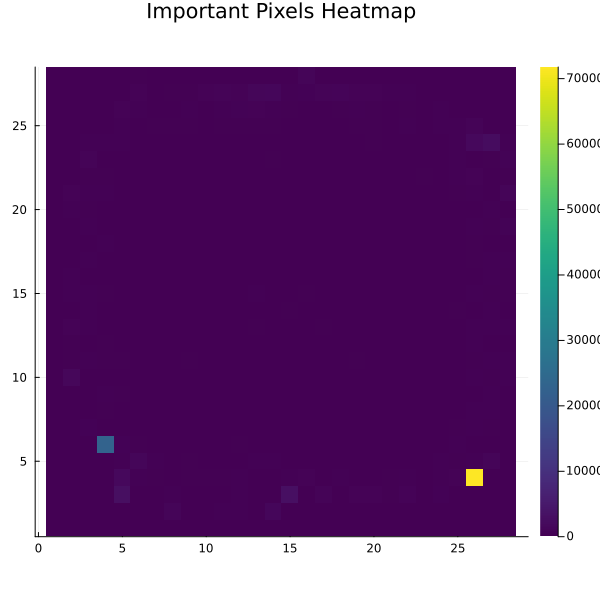

Rank 1: Pixel (26,4) with importance 7.177954986305468e6
Rank 2: Pixel (4,6) with importance 2.258742707708331e6
Rank 3: Pixel (15,3) with importance 266425.0143769122
Rank 4: Pixel (5,3) with importance 256318.4770217885
Rank 5: Pixel (27,24) with importance 203447.22323914984
Rank 6: Pixel (5,4) with importance 145603.48959031358
Rank 7: Pixel (26,24) with importance 144019.3090766456
Rank 8: Pixel (2,10) with importance 115355.09005989745
Rank 9: Pixel (14,2) with importance 111585.1688384016
Rank 10: Pixel (14,27) with importance 106408.89495670788

Analyzing individual digits...
Analyzing digit 0


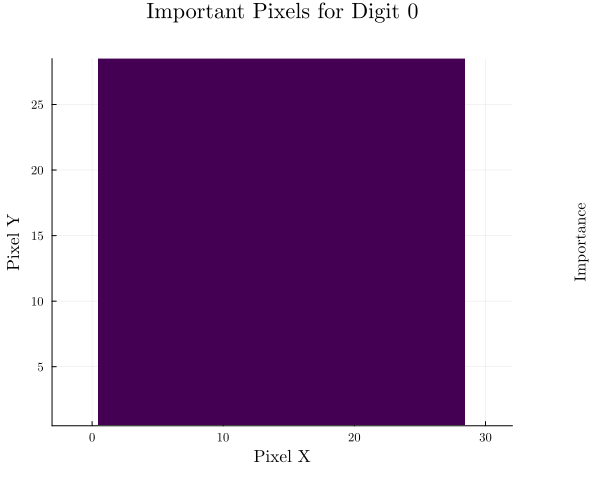

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window


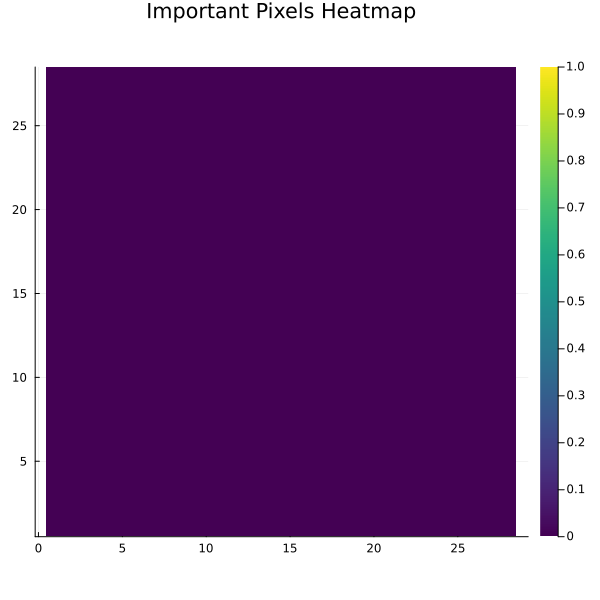

Analyzing digit 1


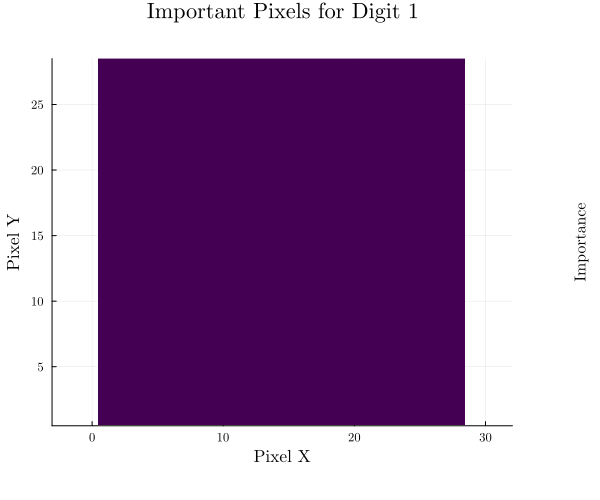

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window


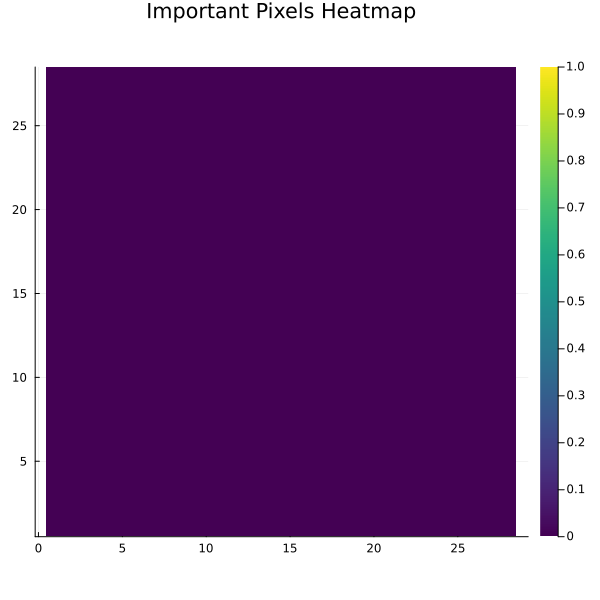

Analyzing digit 2


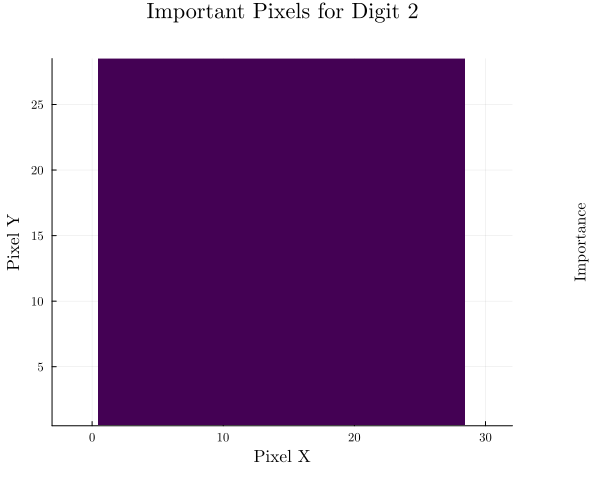

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window


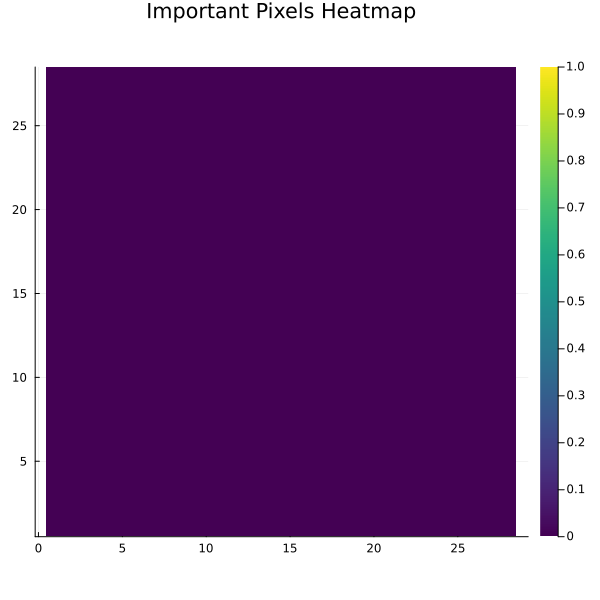

Analyzing digit 3


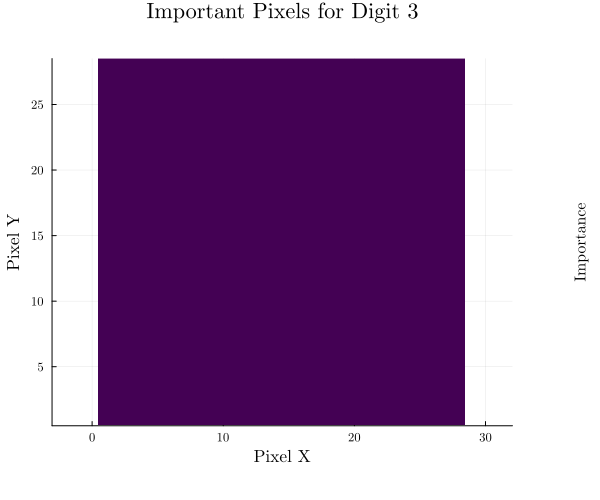

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window


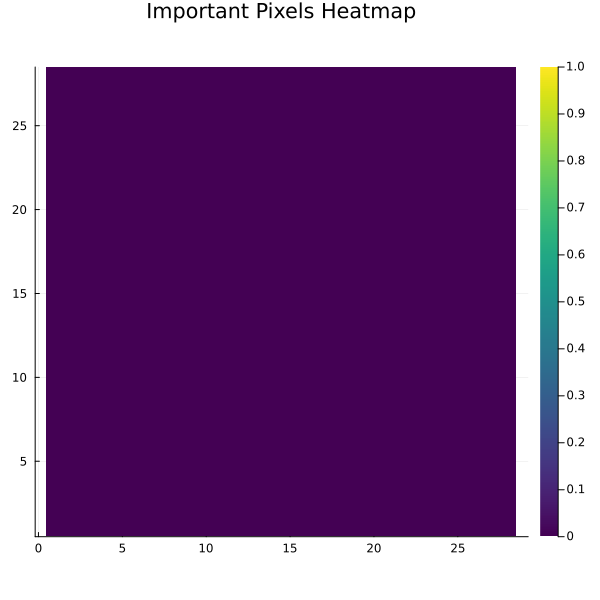

Analyzing digit 4


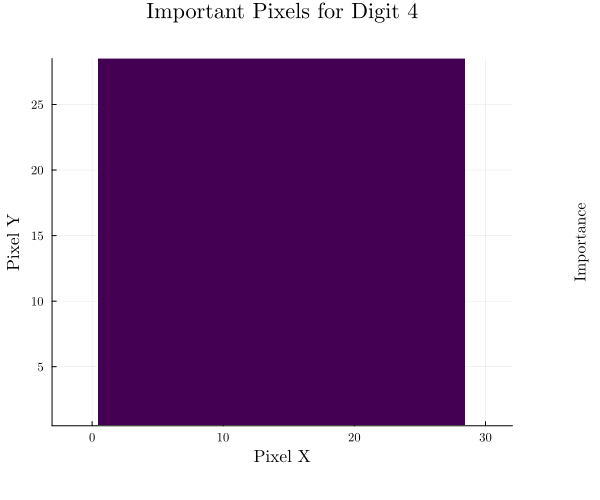

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window


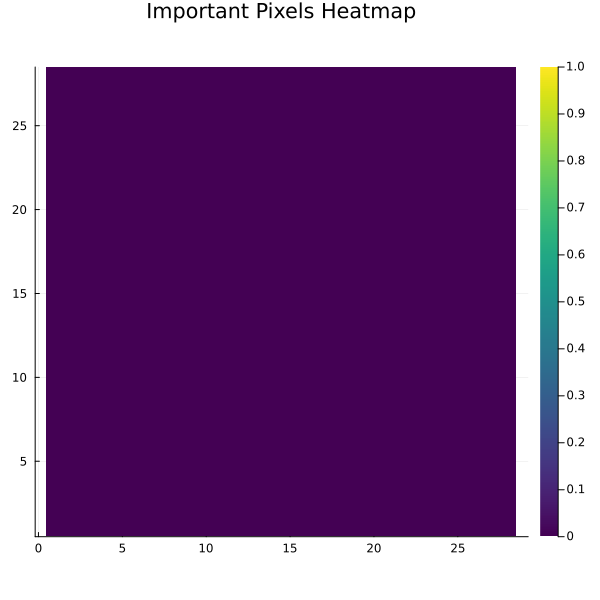

Analyzing digit 5


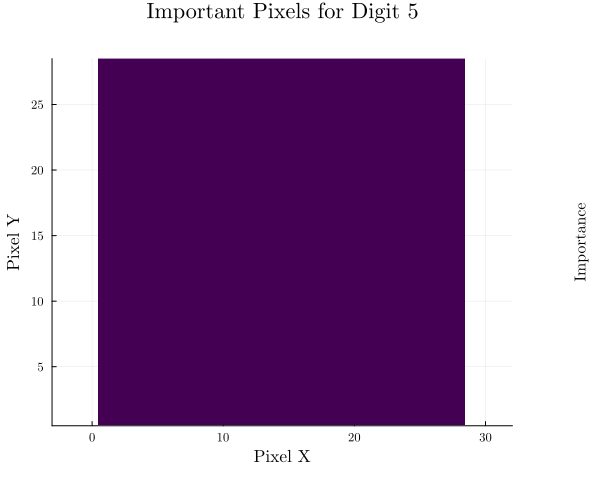

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window


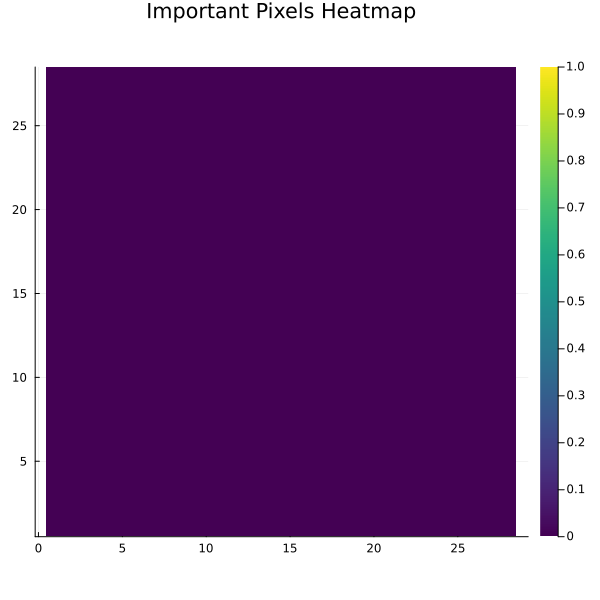

Analyzing digit 6


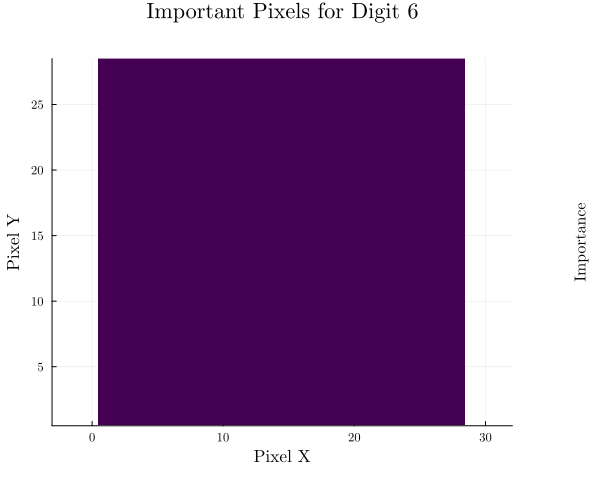

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window


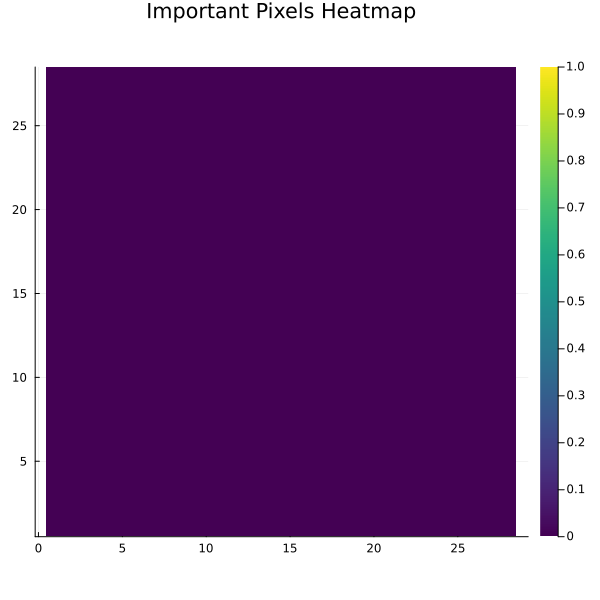

Analyzing digit 7


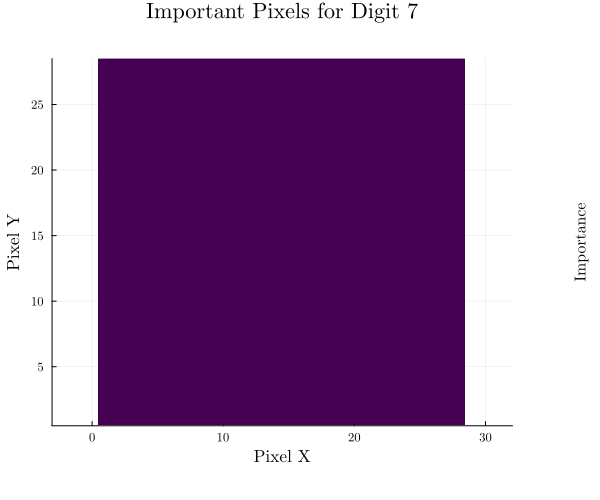

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window


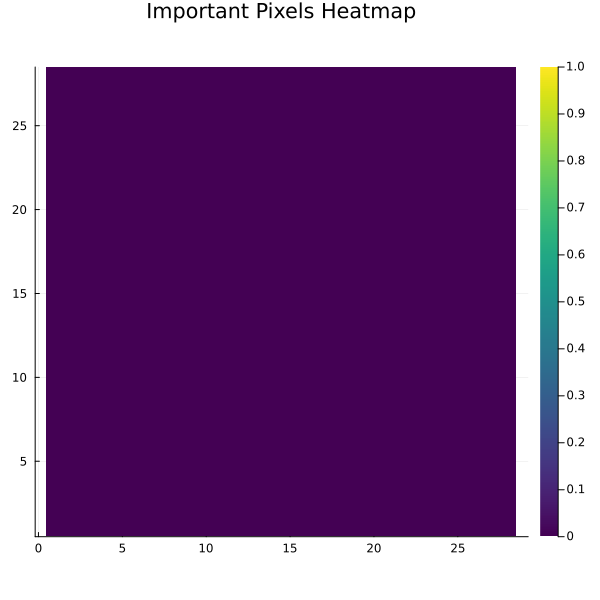

Analyzing digit 8


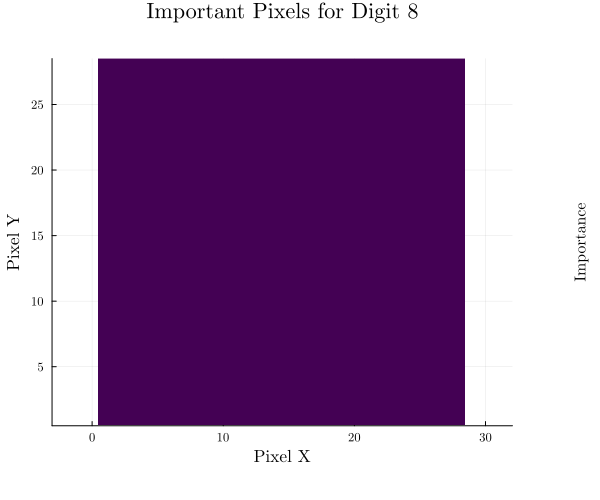

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window


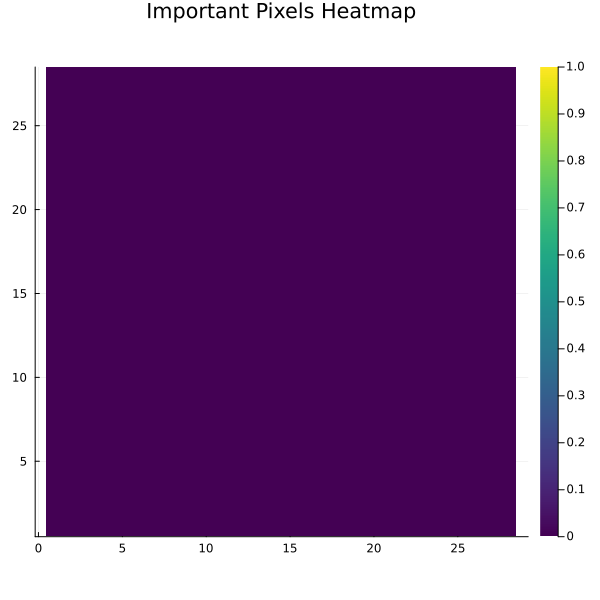

Analyzing digit 9


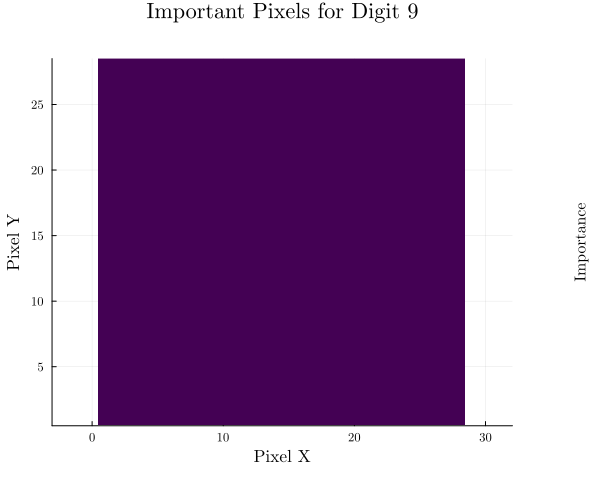

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window


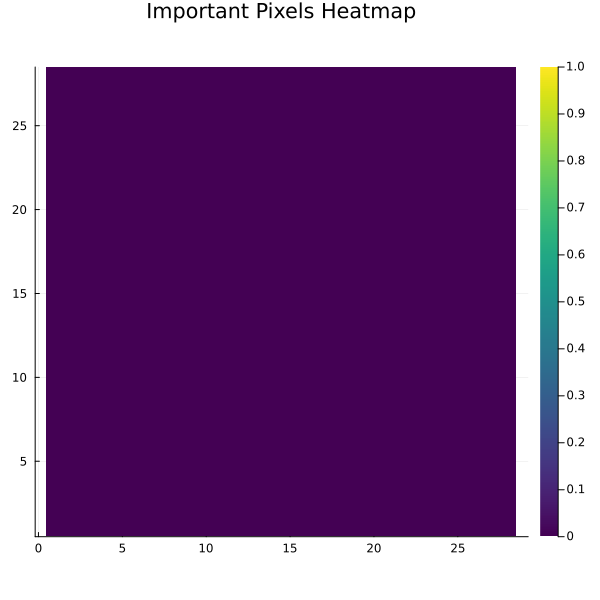


Testing with reduced pixels:
Accuracy with top 50 pixels: 0.149
Accuracy with top 100 pixels: 0.386
Accuracy with top 200 pixels: 0.687
Accuracy with top 400 pixels: 0.799

Final Results:
Best lambda: 0.00016102620275609394
Validation accuracy: 0.803
Test accuracy: 0.812
Model sparsity: 67.4% zero coefficients


([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [-733418.1702714408, -219235.82907420406, 1.2068658064434072e6, 3.2435260059238807e6, -649661.2718608642, -453882.1560789043, 125509.73795725775, -293751.08780474466, 1.5796859672895644e6, -1.1373139515852476e6], [0.0; 0.0; … ; 0.0; 0.0;;])

In [59]:
best_coef, best_intercept = main()